In [2]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [7]:

# This is the path_sensor where you want to search
path_sensor = "/home/julius/Documents/Julius_03"

# this is the extension you want to detect
extension = 'ONLY_NON_ZERO_COMP.csv'
all_files = []
for root, dirs_list, files_list in os.walk(path_sensor):
    for file_name in files_list:
        if os.path.splitext(file_name)[-1] == extension:
            file_name_path = os.path.join(root, file_name)
            all_files.append(file_name_path)  # This is the full path of the filt

all_files = sorted(all_files)
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)

sensor_df = pd.concat(li, axis=0, ignore_index=True)

sensor_df.head(10)

,Subsample,File,Scene,Object,Max,Min,Median,Mean,Std,Var,Px_factor
0,1,depth_000.png,001_standing_coated,canister,465.0,0.0,6.0,92.384482,163.986534,26891.583375,0.790572
1,1,depth_000.png,001_standing_coated,small_bottle,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,depth_000.png,001_standing_coated,medium_bottle,469.0,0.0,4.0,114.749813,174.600079,30485.187743,0.720752
3,1,depth_000.png,001_standing_coated,large_bottle,499.0,0.0,6.0,80.624051,153.522478,23569.151265,0.822260
4,1,depth_001.png,001_standing_coated,canister,513.0,0.0,8.0,68.885069,150.598376,22679.870816,0.864173
5,1,depth_001.png,001_standing_coated,small_bottle,531.0,1.0,8.0,141.645656,206.437901,42616.606979,0.708901
6,1,depth_001.png,001_standing_coated,medium_bottle,514.0,0.0,4.0,147.601080,193.623239,37489.958710,0.648619
7,1,depth_001.png,001_standing_coated,large_bottle,410.0,0.0,10.0,131.838576,171.230580,29319.911473,0.660877
8,1,depth_002.png,001_standing_coated,canister,500.0,0.0,7.0,60.416192,135.310305,18308.878611,0.883048
9,1,depth_002.png,001_standing_coated,small_bottle,538.0,2.0,8.0,124.840094,197.128331,38859.579055,0.743878


In [5]:
#df_grouped = sensor_df.groupby(["Object", "Subsample", "Scene"])#plot(kind='line', subplots=True)

#sensor_data = sensor_df.groupby(["Scene", "Subsample", "Object"])['Mean'].mean().to_frame()
sensor_data = sensor_df.groupby(["Scene"])['Mean'].mean().to_frame()

sensor_data
print(sensor_data.to_string())

                           Mean
Scene                          
001_standing_coated   98.120942
002_lying_coated      76.650217
003_standing_liquid  273.141551
004_lying_liquid     216.391998
005_standing_empty   277.517129
006_lying_empty      217.540792


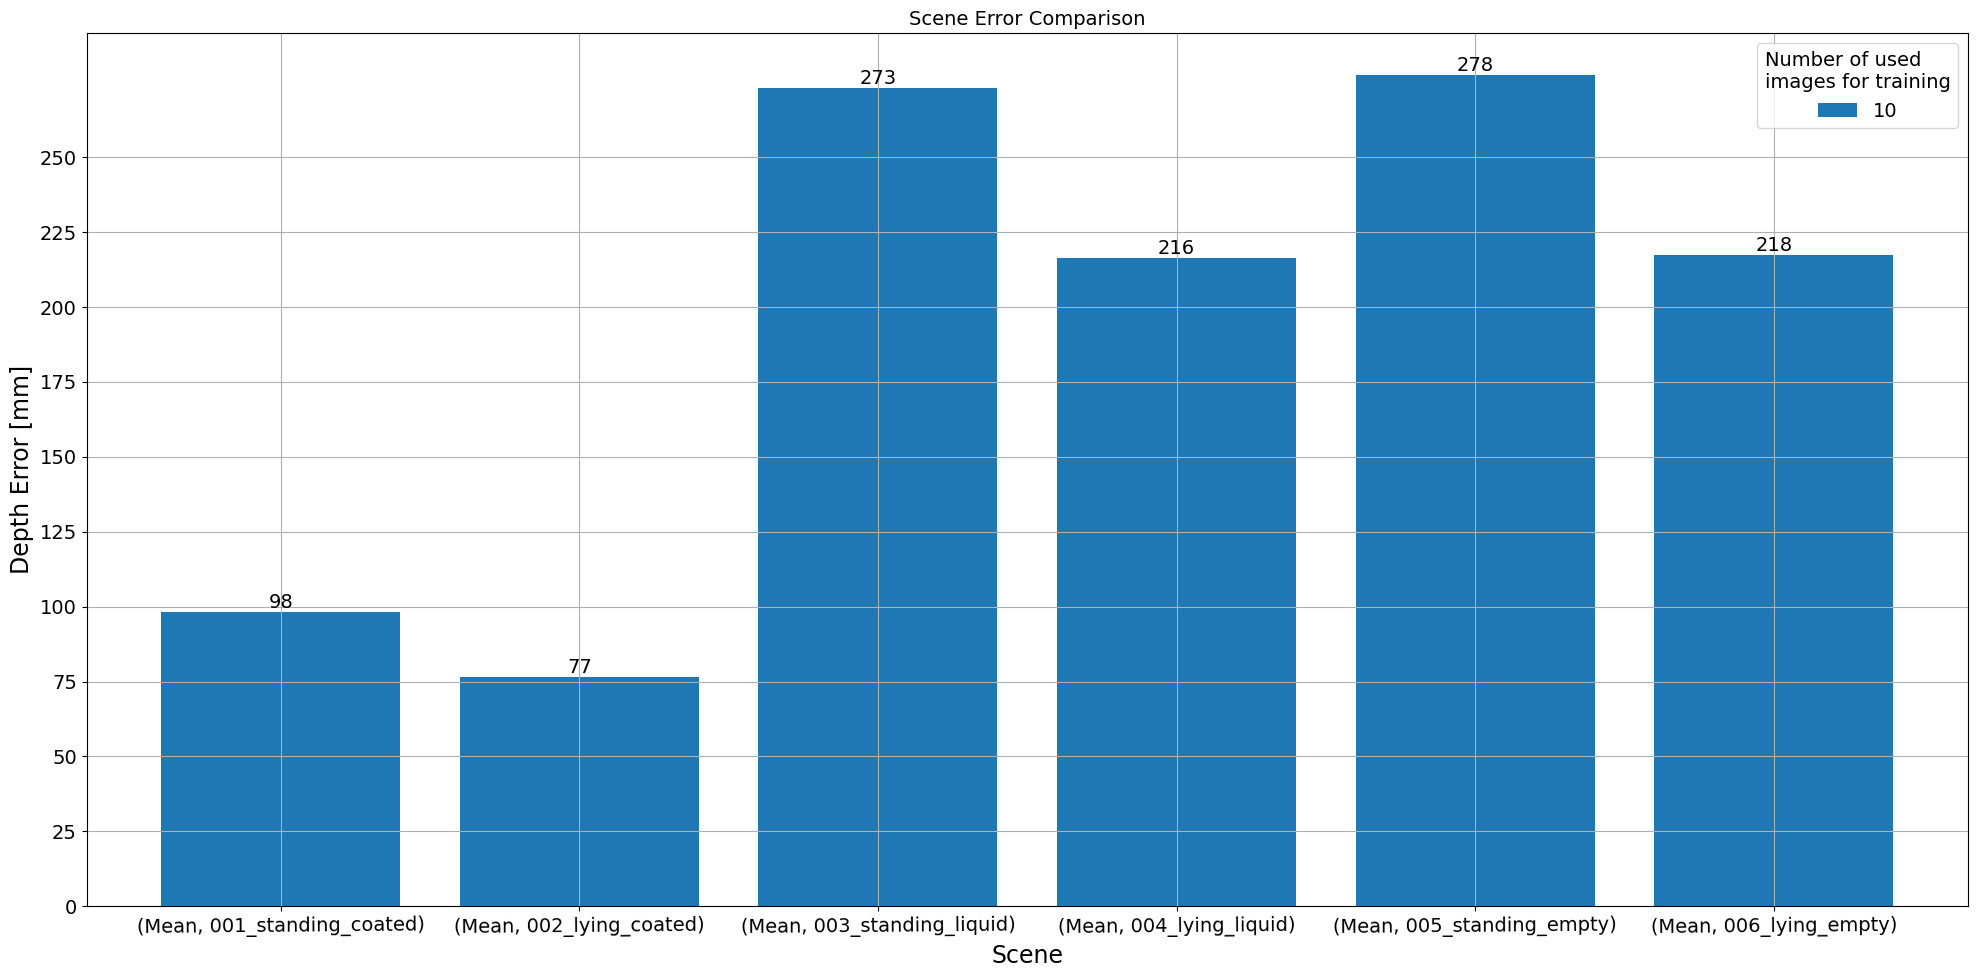

In [6]:

SMALL_SIZE = 14
MEDIUM_SIZE = 17
BIGGER_SIZE = 50

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


ax = sensor_data.unstack().plot(kind='bar', figsize=(20,10), title="Scene Error Comparison", grid=True, yticks=np.arange(0,251,25), xlabel="Scene", ylabel="Depth Error [mm]", rot=0.5, width=0.8)
for c in ax.containers:
    # set the bar label
    ax.bar_label(c, fmt='%.0f', label_type='edge')
    

plt.legend(["10","20","30","40","50","60","80","100","200","300"],
            loc='upper right', title='Number of used \nimages for training')

plt.tight_layout()

#print(sensor_data.unstack())

In [ ]:
# # Create a list of the Scenes
# scenes = list(sensor_data.index.get_level_values('Scene').unique())

# # Create a list of the Objects
# subsamples = list(sensor_data.index.get_level_values('Subsample').unique())

# # plot lineplot for each scene
# #fig, axs = plt.subplots(len(scenes), len(objects))
# for scene in scenes:
#     fig = plt.figure(figsize=(14, 7))
#     df_scene = sensor_data.loc[scene]
    
#     plt.bar(df_scene.index.get_level_values('Subsample'), df_scene['Mean'], label=scene)

#     # set the legend
#     plt.legend()

#     # set the x and y labels
#     plt.yticks(np.arange(0, 301, 50))
#     plt.xticks([0,10,20,30,40,50,60,80,100,200,300])
#     plt.xlabel('Number of used training images')
#     plt.ylabel('Error [mm]')
#     plt.grid()
#     plt.title("Mean depth error per scene")

#     # show the plot
# plt.show()